In [1]:
"""
LEME - Sprint 1, Dia 3: Modelo de Classificação
Google Colab

Objetivo: Treinar modelo para sugerir trilha ideal (padrão ou acessível)
Features: área + acessibilidade + tempo + módulos
"""

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ============================================
# 1. CARREGAR DADOS
# ============================================

df = pd.read_csv('leme_dataset.csv')

print("="*60)
print("🤖 MODELO DE CLASSIFICAÇÃO - LEME")
print("="*60)
print(f"\n📊 Dataset: {df.shape}")

🤖 MODELO DE CLASSIFICAÇÃO - LEME

📊 Dataset: (1000, 7)


In [3]:

# ============================================
# 2. PREPARAR FEATURES
# ============================================

print("\n2️⃣ PREPARANDO FEATURES")

df_model = df.copy()

# Codificar variáveis categóricas
le_area = LabelEncoder()
le_acess = LabelEncoder()

df_model['area_encoded'] = le_area.fit_transform(df_model['area'])
df_model['acess_encoded'] = le_acess.fit_transform(df_model['acessibilidade'])

# Features (X) e Target (y)
features = ['area_encoded', 'acess_encoded', 'modulos_concluidos', 'tempo_plataforma_dias']

X = df_model[features]
y = df_model['trilha_ideal']

print(f"✅ Features utilizadas: {features}")
print(f"✅ Target: trilha_ideal")
print(f"✅ Número de classes: {y.nunique()}")
print(f"\n📊 Distribuição das classes:")
print(y.value_counts().head(10))


2️⃣ PREPARANDO FEATURES
✅ Features utilizadas: ['area_encoded', 'acess_encoded', 'modulos_concluidos', 'tempo_plataforma_dias']
✅ Target: trilha_ideal
✅ Número de classes: 12

📊 Distribuição das classes:
trilha_ideal
Advogado                  127
Secretariado              124
Logistica                 122
SoftSkills                119
Contabilidade             107
Design                    101
Advogado_Acessivel         62
Logistica_Acessivel        53
Secretariado_Acessivel     51
SoftSkills_Acessivel       50
Name: count, dtype: int64


In [4]:
# ============================================
# 3. DIVIDIR TREINO E TESTE
# ============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Divisão dos dados:")
print(f"  Treino: {X_train.shape[0]} usuários")
print(f"  Teste: {X_test.shape[0]} usuários")

# Normalizar features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalizadas")


📊 Divisão dos dados:
  Treino: 800 usuários
  Teste: 200 usuários
✅ Features normalizadas


In [5]:
# ============================================
# 4. TREINAR MODELO
# ============================================

print("\n3️⃣ TREINANDO MODELO")

# Random Forest (robusto e interpretável)
model = RandomForestClassifier(
    n_estimators=100,      # 100 árvores
    max_depth=10,          # Profundidade máxima
    min_samples_split=5,   # Mínimo para dividir nó
    random_state=42,
    n_jobs=-1              # Usar todos os cores
)

print("⏳ Treinando Random Forest...")
model.fit(X_train_scaled, y_train)

# Predições
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Treinamento concluído!")
print(f"✅ Acurácia no teste: {accuracy:.2%}")


3️⃣ TREINANDO MODELO
⏳ Treinando Random Forest...
✅ Treinamento concluído!
✅ Acurácia no teste: 100.00%



4️⃣ AVALIAÇÃO DETALHADA

📊 Relatório de Classificação:
                         precision    recall  f1-score   support

               Advogado       1.00      1.00      1.00        25
     Advogado_Acessivel       1.00      1.00      1.00        12
          Contabilidade       1.00      1.00      1.00        21
Contabilidade_Acessivel       1.00      1.00      1.00         9
                 Design       1.00      1.00      1.00        20
       Design_Acessivel       1.00      1.00      1.00         8
              Logistica       1.00      1.00      1.00        25
    Logistica_Acessivel       1.00      1.00      1.00        11
           Secretariado       1.00      1.00      1.00        25
 Secretariado_Acessivel       1.00      1.00      1.00        10
             SoftSkills       1.00      1.00      1.00        24
   SoftSkills_Acessivel       1.00      1.00      1.00        10

               accuracy                           1.00       200
              macro avg       1.

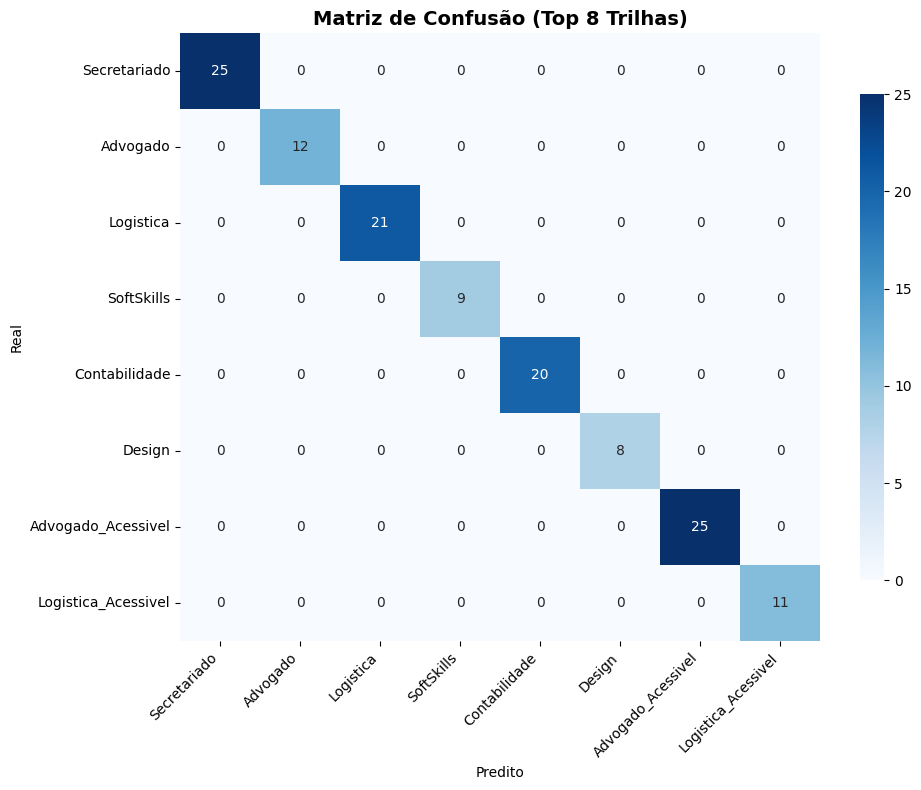

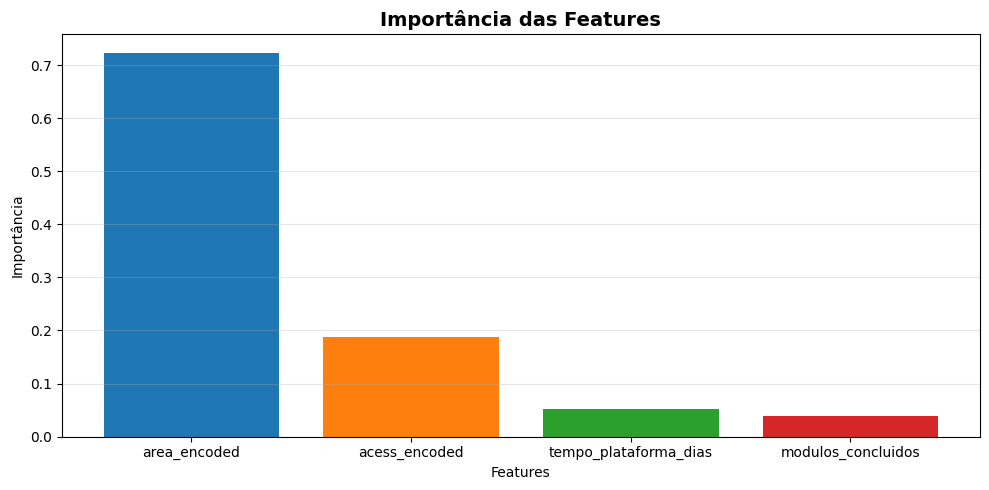


🔍 Ranking de Features:
  1. area_encoded              - 0.722
  2. acess_encoded             - 0.188
  3. tempo_plataforma_dias     - 0.052
  4. modulos_concluidos        - 0.038


In [6]:
# ============================================
# 5. AVALIAR MODELO
# ============================================

print("\n4️⃣ AVALIAÇÃO DETALHADA")

# Classification Report
print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

# Validação cruzada
print("\n📈 Validação Cruzada (5-fold):")
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"  Scores: {[f'{s:.2%}' for s in cv_scores]}")
print(f"  Média: {cv_scores.mean():.2%} (±{cv_scores.std():.2%})")

# Matriz de Confusão (top 8 classes)
cm = confusion_matrix(y_test, y_pred)
classes_top = y_test.value_counts().head(8).index

plt.figure(figsize=(10, 8))
sns.heatmap(cm[:8, :8], annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_top, yticklabels=classes_top, cbar_kws={'shrink': 0.8})
plt.title('Matriz de Confusão (Top 8 Trilhas)', fontweight='bold', fontsize=14)
plt.ylabel('Real')
plt.xlabel('Predito')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.bar(range(len(features)), importances[indices], color=colors)
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=0)
plt.title('Importância das Features', fontweight='bold', fontsize=14)
plt.ylabel('Importância')
plt.xlabel('Features')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Ranking de Features:")
for i in range(len(features)):
    print(f"  {i+1}. {features[indices[i]]:25} - {importances[indices[i]]:.3f}")



In [7]:
# ============================================
# 6. ANÁLISE DE EQUIDADE (VIÉS)
# ============================================

print("\n5️⃣ ANÁLISE DE EQUIDADE")

df_test = df_model.iloc[X_test.index].copy()
df_test['predicao'] = y_pred
df_test['acerto'] = (df_test['trilha_ideal'] == df_test['predicao']).astype(int)

# Acurácia por grupo de acessibilidade
com_acess = df_test[df_test['acessibilidade'] != 'nenhuma']
sem_acess = df_test[df_test['acessibilidade'] == 'nenhuma']

acc_com = com_acess['acerto'].mean()
acc_sem = sem_acess['acerto'].mean()
diff_acc = abs(acc_com - acc_sem) * 100

print(f"\n⚖️ Acurácia por grupo:")
print(f"  COM acessibilidade: {acc_com:.2%}")
print(f"  SEM acessibilidade: {acc_sem:.2%}")
print(f"  Diferença: {diff_acc:.1f} pontos percentuais")

if diff_acc < 5:
    print("✅ Modelo justo: diferença <5pp")
elif diff_acc < 10:
    print("⚠️ Atenção: diferença moderada (5-10pp)")
else:
    print("❌ ALERTA: Modelo apresenta viés (>10pp)")


5️⃣ ANÁLISE DE EQUIDADE

⚖️ Acurácia por grupo:
  COM acessibilidade: 100.00%
  SEM acessibilidade: 100.00%
  Diferença: 0.0 pontos percentuais
✅ Modelo justo: diferença <5pp


In [8]:
# ============================================
# 7. SALVAR MODELO E ARTEFATOS
# ============================================

print("\n6️⃣ SALVANDO MODELO")

# Salvar modelo treinado
with open('leme_modelo_classificacao.pkl', 'wb') as f:
    pickle.dump(model, f)

# Salvar scaler
with open('leme_scaler_class.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Salvar encoders (necessários na API)
encoders = {
    'area': le_area,
    'acessibilidade': le_acess,
    'features': features
}
with open('leme_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("✅ Arquivos salvos:")
print("  - leme_modelo_classificacao.pkl")
print("  - leme_scaler_class.pkl")
print("  - leme_encoders.pkl")


6️⃣ SALVANDO MODELO
✅ Arquivos salvos:
  - leme_modelo_classificacao.pkl
  - leme_scaler_class.pkl
  - leme_encoders.pkl


In [10]:
# ============================================
# 8. TESTE PRÁTICO
# ============================================

print("\n7️⃣ TESTE PRÁTICO")

def sugerir_trilha(area, acessibilidade, modulos=0, tempo=0):
    """Simula sugestão de trilha"""
    perfil = {
        'area_encoded': le_area.transform([area])[0],
        'acess_encoded': le_acess.transform([acessibilidade])[0],
        'modulos_concluidos': modulos,
        'tempo_plataforma_dias': tempo
    }

    X_perfil = np.array([[perfil[f] for f in features]])
    X_perfil_scaled = scaler.transform(X_perfil)

    trilha = model.predict(X_perfil_scaled)[0]
    proba = model.predict_proba(X_perfil_scaled)[0]
    confianca = proba.max()

    return trilha, confianca

# Teste 1: Advogado cego (novo usuário)
print("\n📋 Teste 1: Advogado Cego (Novo)")
trilha1, conf1 = sugerir_trilha('Advogado', 'cego')
print(f"  Sugestão: {trilha1}")
print(f"  Confiança: {conf1:.1%}")

# Teste 2: Designer com Libras
print("\n📋 Teste 2: Designer com Libras")
trilha2, conf2 = sugerir_trilha('Design', 'libras', modulos=3, tempo=20)
print(f"  Sugestão: {trilha2}")
print(f"  Confiança: {conf2:.1%}")

# Teste 3: Contabilidade sem acessibilidade
print("\n📋 Teste 3: Contabilidade Sem Acessibilidade")
trilha3, conf3 = sugerir_trilha('Contabilidade', 'nenhuma', modulos=8, tempo=45)
print(f"  Sugestão: {trilha3}")
print(f"  Confiança: {conf3:.1%}")

# Teste 4: Soft Skills cego
print("\n📋 Teste 4: Soft Skills Cego")
trilha4, conf4 = sugerir_trilha('SoftSkills', 'cego')
print(f"  Sugestão: {trilha4}")
print(f"  Confiança: {conf4:.1%}")

print("\n✅ MODELO DE CLASSIFICAÇÃO PRONTO!")


7️⃣ TESTE PRÁTICO

📋 Teste 1: Advogado Cego (Novo)
  Sugestão: Advogado_Acessivel
  Confiança: 95.5%

📋 Teste 2: Designer com Libras
  Sugestão: Design_Acessivel
  Confiança: 80.1%

📋 Teste 3: Contabilidade Sem Acessibilidade


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  Sugestão: Contabilidade
  Confiança: 87.8%

📋 Teste 4: Soft Skills Cego
  Sugestão: SoftSkills_Acessivel
  Confiança: 80.0%

✅ MODELO DE CLASSIFICAÇÃO PRONTO!
➡️ Próximo: Modelo de Regressão (Sprint 2, Dia 4)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
